## COMP SCI 7327 Concepts in Artificial Intelligence and Machine Learning -- Assignment 1



### Task 1： Explain the basic concepts (5 marks)

1. ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Please explain how the ROC curve works in the binary classification (1 mark).

2. Please describe what is cross-entropy and under what circumstances cross-entropy can be used (2 marks)?

4. Please explain what are the similarities and differences of L1 loss and MSE loss in training a classifier (2 marks)?



#### 1. ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. Please explain how the ROC curve works in the binary classification

A Receiver Operator Characteristic (ROC) graph provide a simle way to summarize all of the confusion matrices that each threshold produced. The y-axis shows the true positive rate (TPR) which is the same thing as sensitivity. The x-axis shows the false positive rate (FPR), which is the same thing as 1 - Specificity

A ROC curve is constructed by plotting the TPR against the FPR. The ROC curve shows the trade-off between sensitivity and specificity. Classifiers that give curves closer to the top-left corner indicate a better performance. Based on the ROC curve, it is easy to find the most optimal threshold for binary classification depending on the acceptable FPR.

#### 2. Please describe what is cross-entropy and under what circumstances cross-entropy can be used?

Cross entropy originated from information theory. If the cross-entropy is large then the probability the event will happen is low and vise versa. In machine learning, cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes. The value of cross-entropy will grow very large if the predicted probability for the true class is close to 0. In an other words, the high value of cross-entropy means bad models and a low value of cross-entropy means a good model.

Cross-entropy is commonly used as a cost function when training classification models because it minimizes the the distance between two probability distributions (predicted and actual distributions).

#### 3. Please explain what are the similarities and differences of L1 loss and MSE loss in training a classifier?

##### Similarities
- 2 loss functions calculate the differences between the predicted value and actual values.
- Commonly used for regression instead of classification. Because in classification, class label will be a one-hot encoded vector or 0, 1 or multi class, the difference of predicted and actual values will be always 0 or 1 (correct and not correct) and then it can not help to update the parameter.

##### Differences
- L1 loss uses mean square error and MAE loss uses mean absolute error.

# Task 2 ：Python programming (8 marks)

1. Given a list of numbers: num=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], write python code that finds all odd numbers in a list and returns a new list that contains all the odd numbers (2 marks).

In [1]:
def get_list_odd_numbers(num):
    # Return list odd numbers
    result = []
    
    for item in num:
        # If item not divided by 2, this item is a odd number
        if (item % 2) != 0:
            # Add a odd number to result
            result.append(item)
    
    # Return result
    return result

num=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
list_odd_numbers = get_list_odd_numbers(num)

print(list_odd_numbers)

[1, 3, 5, 7, 9, 11, 13, 15]


2. The “carry” means if the summation of one digital position is greater than 10, an another 1 will be added to the next position. Please write python code to count the number of the “carry” operations. For example, 123+456 has no "carry" as neither of 3+6，2+5, 1+4 is greater than 10. Some other examples are as below (3 marks):

> **Example 1:**

> Input: 
> 123+456

> Output:
> No carry operation.

> **Example 2:**

> Input: 
> 555+555

> Output:
> 3 carry operations.

> **Example 3:**

> Input: 
> 123+594

> Output:
> 1 carry operation.


In [2]:
def count_number_of_carry(input_string):
    # Remove spaces
    input_string = input_string.strip().replace(" ", "")
    
    # Split add operator
    split = input_string.split("+")
    
    # Get first number
    first_number = split[0]
    length_first_number = len(first_number)
    
    # Get second number
    second_number = split[1]
    length_second_number = len(second_number)
    
    # Number of carry operations
    number_of_carry = 0
    
    # Carry after a summary
    carry = 0
    
    # Start index from -1, begin from the last character
    index = -1
    
    # Stop until index out of range
    while abs(index) <= length_first_number and abs(index) <= length_second_number:
        # Calculate summary with carry
        temp = int(first_number[index]) + int(second_number[index]) + carry
        
        # Reset carry to 0
        carry = 0
        
        # Check summary larger or equal than 10
        if temp >= 10:
            number_of_carry += 1
            carry = 1
        
        index -= 1
        
    if number_of_carry > 0:
        return f"{number_of_carry} carry operations."
    
    return "No carry operation."
    
print(count_number_of_carry("123+456"))
print(count_number_of_carry("555+555"))
print(count_number_of_carry("123+594"))

No carry operation.
3 carry operations.
1 carry operations.


3. Roman numerals are represented by seven different symbols: I (=1) , V (=5), X(=10), L (=50), C(=100), D (=500) and M(=1000). For example, 2 is written as 'II' in Roman numeral, just two 'I' added together. The number 27 is written as XXVII, which is XX + V + II. Your task is to write a Python code that recognizes the roman numbers. The input and output should be in the format as shown below (3 marks):

>**Example 1:**

>Input: s = "III"

>Output: 3

>**Example 2:**

>Input: s = "LVIII"

>Output: 58

>**Example 3:**

>Input: s = "MCMXCIV"

>Output: 1994




In [3]:
def get_number_from_roman_numerals(input_string):
    # Utility function: convert a character in (I, V, X, L, C, M) to a number
    def convert_a_character_to_number(char):
        if char == "I":
            return 1
        if char == "V":
            return 5
        if char == "X":
            return 10
        if char == "L":
            return 50
        if char == "C":
            return 100
        if char == "D":
            return 500
        if char == "M":
            return 1000
        
        raise SyntaxError(f"{char} is not valid")
    
    # Strip input
    input_string = input_string.strip()

    # If input is empty, return blank
    if len(input_string) == 0:
        return ""
    
    # Result
    result = 0
    
    # Put all numbers to queue
    queue = list()
    for char in input_string:
        queue.append(convert_a_character_to_number(char))

    # If current number is larger or equal to next number 
    # or current number is the last number add current number to result.
    # Else minus current number to result
    current_number = None
    next_number = None
    while True:
        # Get current number
        if next_number is None:
            current_number = queue.pop(0)
        else:
            current_number = next_number
        
        # Get next number
        try:
            next_number = queue.pop(0)
        except:
            # queue is empty, can not get any number
            result += current_number
            
            # Break the while loop
            break
        
        # If current number is larger or equal to next number, add current_number to result
        # Else minus next number to result
        if current_number >= next_number:
            result += current_number
        else:
            result -= current_number

    return result

s = "III"
print(get_number_from_roman_numerals(s))
s = "LVIII"
print(get_number_from_roman_numerals(s))
s = "MCMXCIV"
print(get_number_from_roman_numerals(s))

3
58
1994


# Task 3 : Algorithm Programming (7 marks)

1. Download the MNIST dataset and split the dataset into a training set (70% of the data), validation set (10% of the data) and testing set (20% of the data) (1 Mark).

2. Build a classifier with three convolutional layers with pyTorch 1.2.0 (cpu version) (2 Marks).

3. Successfully train the classifier and record the accuracy on the testing set. Please note that you will need to use all the three subsets you got in 1. (2 Marks).
4. Please draw the loss curves and accuracy curves for both the training and validation set. You have to use Matplotlib to draw the figure.(2 Marks).








#### 1. Download the MNIST dataset and split the dataset into a training set (70% of the data), validation set (10% of the data) and testing set (20% of the data)

The whold mnist dataset size is 70000
Training dataset size is 49000
Validation dataset size is 7000
Test dataset size is 14000

Data visualization for the first 64 items in training dataset:
Labels:  tensor([6, 5, 8, 9, 1, 9, 2, 8, 1, 3, 8, 1, 2, 1, 8, 6, 0, 0, 3, 0, 6, 8, 6, 7,
        6, 2, 2, 0, 0, 2, 7, 4, 4, 3, 3, 5, 2, 1, 5, 9, 4, 8, 8, 5, 3, 4, 1, 2,
        9, 3, 0, 3, 9, 9, 6, 4, 6, 8, 7, 9, 0, 0, 9, 7])
Batch shape:  torch.Size([64, 1, 28, 28])


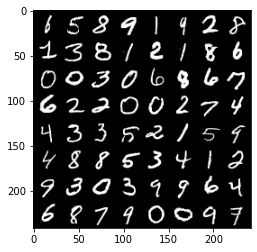

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torchvision

from torch import nn, optim
from torch.utils.data import DataLoader, random_split

from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

from sklearn.model_selection import KFold

# 1.1. Download MNIST dataset
train_data = datasets.MNIST(root = 'data', train = True, transform = ToTensor(), download = True)
test_data = datasets.MNIST(root = 'data', train = False, transform = ToTensor())

# Combination 2 data set to get the whole data set
mnist = torch.utils.data.ConcatDataset([train_data, test_data])

# Get size of whole dataset
mnist_size = 0
for dataset in mnist.datasets:
    mnist_size += len(dataset)
print("The whold mnist dataset size is", mnist_size)

# 1.2. Get training_set (70% of the data), validation_set (10% of the data), test_set (20% of the data)
# Calculate number of items in each dataset
training_count = int(0.7 * mnist_size) # 70% of the data
validation_count = int(0.1 * mnist_size) # 10% of the data
test_count = mnist_size - training_count - validation_count # 20% of the data

# Split the whole dataset into 3 subset: traininig set, validationg set and test set
training_set, validation_set, test_set = torch.utils.data.random_split(
    mnist, 
    [training_count, validation_count, test_count], 
    generator=torch.Generator().manual_seed(42))

print("Training dataset size is", len(training_set))
print("Validation dataset size is", len(validation_set))
print("Test dataset size is", len(test_set))
print()

# Create dataloader with 3 categories: training, validation and test
BATCH_SIZE = 64
loaders = {
    'training' : torch.utils.data.DataLoader(training_set, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'validation' : torch.utils.data.DataLoader(validation_set, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_set, 
                                          batch_size=BATCH_SIZE, 
                                          shuffle=True, 
                                          num_workers=1),
}


# Data visualization
print(f"Data visualization for the first {BATCH_SIZE} items in training dataset:")
def visualization(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    
data_iter = iter(loaders['training'])
images, labels = data_iter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())
visualization(images)

#### 2. Build a classifier with three convolutional layers with pyTorch 1.2.0 (cpu version)

In [8]:
# 2.1. Build a class neural network with 3 convolutional layers
class NeuralNetwork(nn.Module):
    # Declaring the Architecture
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        # output of each convolutional layer = [(in_channel + 2*padding - kernel_size) / stride] + 1
        
        # The first convolutional layer
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1, # input is a gray image 28x28 => in channel = 1          
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        # After the first convolutional layer the output of this layer is:
        # [(28 + 2*2 - 5)/1] + 1 = 28.
        # Since maxpooling with kernel_size=2 are used, the output is divided by 2
        # 28 / 2 = 14
        
        # The second convolutional layer
        self.conv2 = nn.Sequential(         
            nn.Conv2d(
                in_channels=16,              
                out_channels=32,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),           
            nn.ReLU()               
        )
        # After the second convolutional layer the output of this layer is:
        # [(14 + 2*2 - 5)/1 + 1] = 14
        
        # The third convolutional layer
        self.conv3 = nn.Sequential(         
            nn.Conv2d(
                in_channels=32,              
                out_channels=64,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),           
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),                
       )
        # After the third convolutional layer the output of this layer is:
        # [(14 + 2*2 - 5)/1 + 1] = 14
        # Since maxpooling with kernel_size=2 are used, the output is divided by 2
        # 14/2 = 7
        
        # out channel of the third convolutional layer is 64
        # output of the third convolutional is 7
        # output layer with 10 classes
        self.out = nn.Linear(64*7*7, 10)
        
    # Forward Pass
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        
        # Flatten the images
        x = x.view(x.shape[0],-1)
        
        x = self.out(x)
        
        return x

# Hyperparameters
# epochs: number times that the learning algorithm will work through the entire training dataset.
epochs = 5
# Learning rate
learning_rate = 0.01

model = NeuralNetwork()
print(model)    
    
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer function
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

NeuralNetwork(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=3136, out_features=10, bias=True)
)


#### 3. Successfully train the classifier and record the accuracy on the testing set. Please note that you will need to use all the three subsets you got in 1

In [9]:
# min_valid_loss = np.inf

# List loss to draw loss curves
train_loss_lst = []
valid_loss_lst = []

# 3.1. Training and validate model
for e in range(epochs):
    model.train()
    
    # loss in each epoch
    train_epoch_loss = []
    valid_epoch_loss = []
    
    # training model
    train_loss = 0.0
    train_num_correct = 0.0
    train_num_samples = 0.0
    for data, labels in loaders['training']:
        
        # Clear the gradients
        optimizer.zero_grad()
        
        # Forward Pass
        target = model(data)
        
        # Find the Loss
        loss = criterion(target,labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update Weights
        optimizer.step()
        
        # Calculate Loss
        train_loss += loss.item()
        train_epoch_loss.append(loss.item())
        
        _, predictions = target.max(1)
        train_num_correct += (predictions == labels).sum()
        train_num_samples += predictions.size(0)
     
    # Append average training loss of a epoch to train_loss_lst
    train_loss_lst.append(sum(train_epoch_loss) / len(train_epoch_loss))
    
    # ----------------------------------------------------------
    # validating model
    model.eval()
    
    valid_loss = 0.0
    validation_num_correct = 0.0
    validation_num_samples = 0.0
    for data, labels in loaders['validation']:
         
        # Forward Pass
        target = model(data)
        
        # Find the Loss
        loss = criterion(target,labels)
        
        # Calculate Loss
        valid_loss += loss.item()
        valid_epoch_loss.append(loss.item())
        
        _, predictions = target.max(1)
        validation_num_correct += (predictions == labels).sum()
        validation_num_samples += predictions.size(0)
    
    # Append average validation loss of a epoch to valid_loss_lst
    valid_loss_lst.append(sum(valid_epoch_loss) / len(valid_epoch_loss))
    
    # Print training loss and validation loss of each epoch
    print(f'Epoch {e+1}')
    print(f'Training Loss: {train_loss / len(loaders["training"])}')
    print(f'Training Accuracy: {float(train_num_correct)/float(train_num_samples)*100:.2f}%') 
    print(f'Validation Loss: {valid_loss / len(loaders["validation"])}')
    print(f'Validation Accuracy: {float(validation_num_correct)/float(validation_num_samples)*100:.2f}%') 
    print()
         
# 3.2. Test model
def test(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for data, label in loader:
            scores = model(data)
            _, predictions = scores.max(1)
            num_correct += (predictions == label).sum()
            num_samples += predictions.size(0)
        print("Test model with test dataset")
        print(f'Number of correct predictions: {num_correct}')
        print(f'Number of samples: {num_samples}')
        print(f'Accuracy: {float(num_correct)/float(num_samples)*100:.2f}%') 
    
    model.train()
    
test(loaders['test'], model)


Epoch 1
Training Loss: 0.853074503318448
Training Accuracy: 74.50%
Validation Loss: 0.2624932405623523
Validation Accuracy: 91.89%

Epoch 2
Training Loss: 0.1949362678030219
Training Accuracy: 94.21%
Validation Loss: 0.15207680590789427
Validation Accuracy: 95.29%

Epoch 3
Training Loss: 0.12757379316795356
Training Accuracy: 96.13%
Validation Loss: 0.1050453217361461
Validation Accuracy: 96.81%

Epoch 4
Training Loss: 0.09828945720329997
Training Accuracy: 96.98%
Validation Loss: 0.08848543064668775
Validation Accuracy: 97.27%

Epoch 5
Training Loss: 0.08237226354322996
Training Accuracy: 97.49%
Validation Loss: 0.07581766597418622
Validation Accuracy: 97.59%

Test model with test dataset
Number of correct predictions: 13659
Number of samples: 14000
Accuracy: 97.56%


#### 4. Please draw the loss curves and accuracy curves for both the training and validation set. You have to use Matplotlib to draw the figure

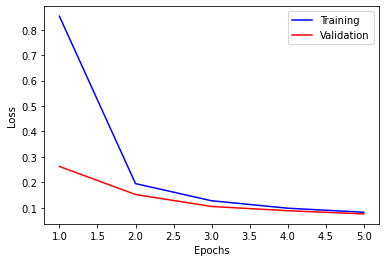

In [10]:
# Plotting
plt.plot(np.linspace(1, epochs, epochs).astype(int), train_loss_lst, '-b', label='Training')
plt.plot(np.linspace(1, epochs, epochs).astype(int), valid_loss_lst, '-r', label='Validation')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()